In [45]:
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [46]:
import numpy as np
import pandas as pd

In [47]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [49]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [50]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [51]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [52]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [53]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

One year ago from today 2016-08-23


Text(55.375,0.5,'Precipitation')

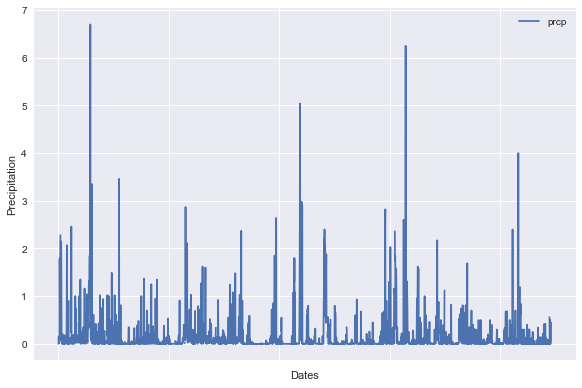

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results    
# Calculate the date 1 year ago from today
last_year = dt.date(2017,8,23) - dt.timedelta(365)
print("One year ago from today " + str(last_year))

# Perform a query to retrieve the data and precipitation scores
rainquery = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
raindf = pd.DataFrame(rainquery)

raindf.set_index("date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
raindf.plot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel("Dates")
plt.ylabel("Precipitation")


In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data
raindf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [56]:
# How many stations are available in this dataset?
stations = session.query(Station)
print(stations)
print("-----------------------------")
stations = session.query(Station.station).all()    
print(stations)
print("-----------------------------")
stations_count = session.query(Station.name).count()
print(f"There are {stations_count} stations in this dataset.")


SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station
-----------------------------
[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]
-----------------------------
There are 9 stations in this dataset.


In [57]:
# What are the most active stations?
active = session.query(Measurement)
print(active)

active = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
busiest_station = active[0][0]
print(f"The most active station {active[0][0]} had {active[0][1]} observations.")
# List the stations and the counts in descending order.
for station, count in active:
    print(f"Station: {station} had {count} observations.")

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement
The most active station USC00519281 had 2772 observations.
Station: USC00519281 had 2772 observations.
Station: USC00513117 had 2696 observations.
Station: USC00519397 had 2685 observations.
Station: USC00519523 had 2572 observations.
Station: USC00516128 had 2484 observations.
Station: USC00514830 had 1937 observations.
Station: USC00511918 had 1932 observations.
Station: USC00517948 had 683 observations.
Station: USC00518838 had 342 observations.


In [58]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_highest = session.query(Measurement.station, func.max(Measurement.prcp)).filter(Measurement.station == busiest_station).all()
print(active_highest)
active_lowest = session.query(Measurement.station, func.min(Measurement.prcp)).filter(Measurement.station == busiest_station).all()
print(active_lowest)
active_mean = session.query(Measurement.station, func.avg(Measurement.prcp)).filter(Measurement.station == busiest_station).all()
print(active_mean)

[('USC00519281', 9.64)]
[('USC00519281', 0.0)]
[('USC00519281', 0.2123520923520915)]


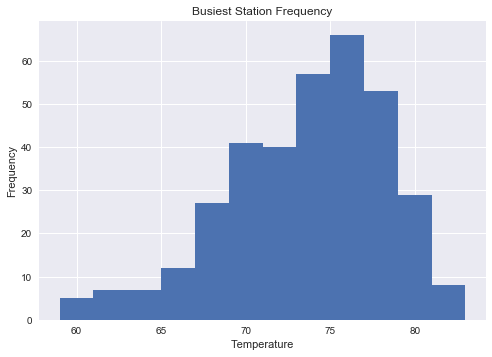

In [59]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year = dt.date(2017,8,23) - dt.timedelta(365)
most_recent = dt.datetime(2017,8,23)

busiest_rainquery = session.query(Measurement.tobs).filter(Measurement.station == busiest_station, Measurement.date >= last_year).order_by(Measurement.tobs).all()
df_busiest = pd.DataFrame(busiest_rainquery)
df_busiest.hist(column='tobs', bins=12)
plt.title("Busiest Station Frequency")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

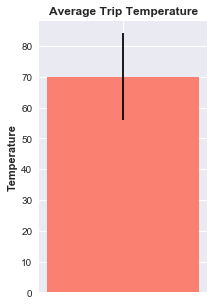

In [67]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    # Converting to date time
    startDate = dt.datetime.strptime(start_date, "%Y-%m-%d")
    endDate = dt.datetime.strptime(end_date, "%Y-%m-%d")
    
    query = session.query(Measurement.tobs).filter(Measurement.date>=start_date, Measurement.date<=end_date).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    

    plt.figure(figsize=(4,6))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='salmon')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.show()

temps = calc_temps('2017-01-20', '2017-01-31')